### **INTRODUCTION TO EXPLORATORY DATA ANALYSIS (EDA)**

Machine learning is a subset of Data Science. In Machine Learning we build models that are capable of learning from data without it being explictly programmed with the help of predefined algorithms.

* Before starting the EDA process, its quite important to have a good understanding of the data science pipeline and your role in it as a data scientist. I believe this is what makes Data Science as the Sexiest Job of the 21st century. [Harvard Business Review](https://hbr.org/2012/10/data-scientist-the-sexiest-job-of-the-21st-century)

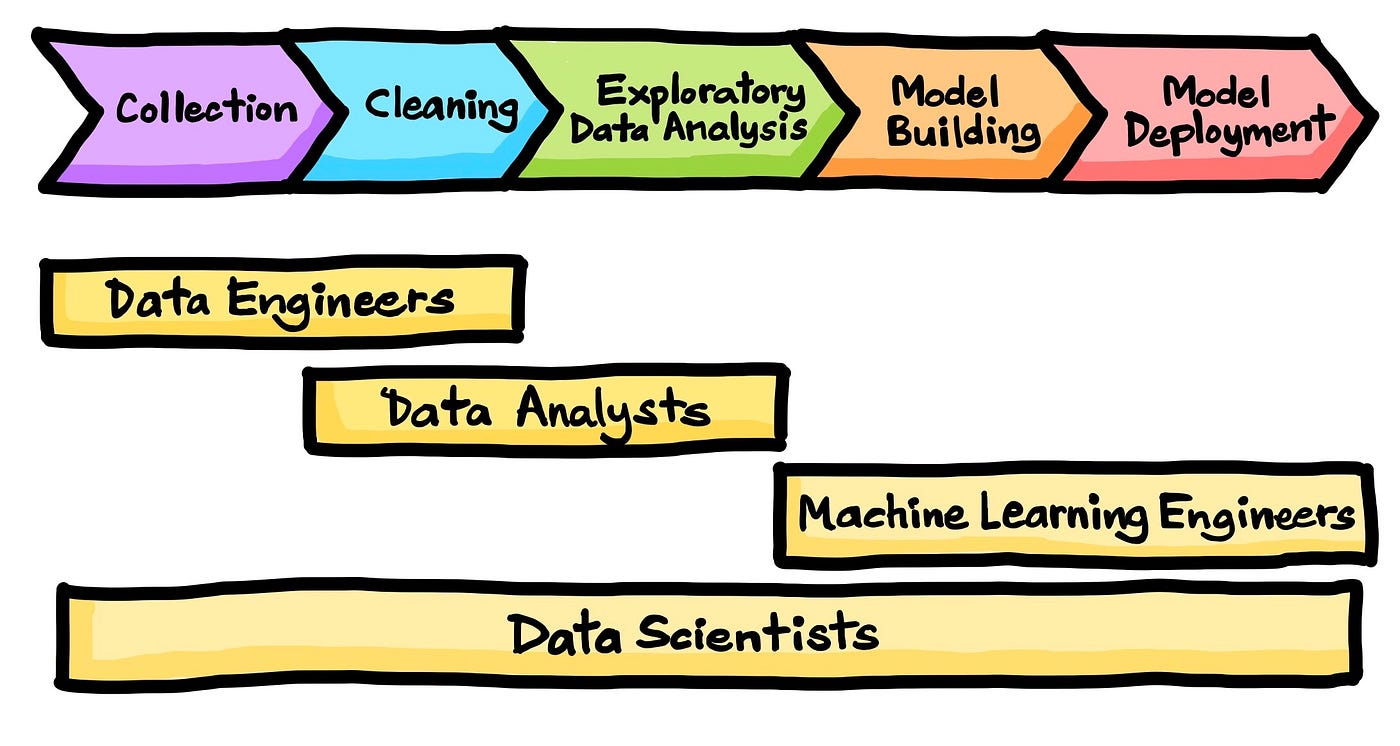


### **EXPLORATORY DATA ANALYSIS**

The science in data science is EDA. This is were you have to experiment with your data. EDA is an empirical process that leverages scientific methods to **experiment**, **understand**, and **find relationships** between the features in your dataset to generate insights and validate hypothesis.

EDA is an iterative process, sometimes it includes PDA, Data cleaning, **one variable**, **two variable** and **multi-variable analysis**. It will help you understand the structure of your data, discover patterns, and gain insights

For most dataset, it is advisable to carry out your EDA first before data cleaning. This will help you have a good knowledge of your dataset before commencing any form of manipulation, deletion or transformation.

EDA starts by understanding the distribution of your data. It's essential to know the **measures of center**, such as mean, median, and mode, as well as the **measure of spread and variability**. This knowledge helps you identify outliers, which are data points significantly different from others, and handle them appropriately.

**There are two broad reasons for EDA**
1. To prepare data for machine learning models.
2. To understand patterns and insights in data more generally.

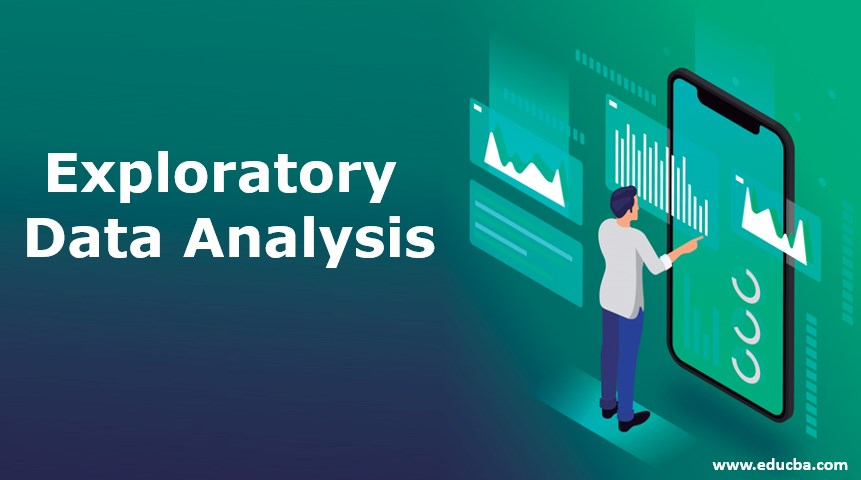

**What Are The Best Practices For EDA?**

1. **Understand Your Data:** Before embarking on any analysis, it is crucial to familiarize yourself with the dataset by carry out the preliminary data analysis(PDA)

2. **Visualize Your Data:** To gain a quick insight into what your data represents and what it is saying, you have to visualize. This will help you to have a cleaer picture of your data.

3. **Handle Missing Data:** It is essential to identify and understand the nature of missing values in your dataset. Decide on an appropriate strategy for handling missing data, Whatever approach you choose, ensure transparency in your methods to maintain the reproducibility of your analysis.

4. **Check for Outliers:** Ensure to consider the context of your analysis and the nature of the data when deciding whether to keep or remove outliers. In some cases, outliers may represent valid observations and should be retained; in others, they may indicate errors and should be removed.

5. **Explore Relationships:** EDA is not just about exploring individual variables but also about understanding the relationships between variables. During your exploration look for trends, dependencies, and potential confounding factors that may influence your analysis. Understanding these relationships is crucial for making informed decisions and deriving meaningful insights from your data.

6. **Segment Your Data:**
Data segmentation involves dividing your dataset into meaningful categories or segments to analyze patterns and trends more effectively. By segmenting data based on relevant criteria such as demographics, geography, or behavior, you can gain deeper insights and tailor your analysis to specific groups.

7. **Use Descriptive Statistics:**
Descriptive statistics, such as mean, median, standard deviation, and quartiles, provide a summary of your data's central tendency and dispersion. These statistics help you understand the distribution of your data and identify outliers or patterns that may require further investigation.

8. **Consider Time Trends:**
Analyzing time trends is crucial if your data has a temporal component. Time series analysis can reveal patterns, seasonality, and trends over time. Visualizing data using line charts or seasonal decomposition plots can help you understand how variables change over different periods.

9. **Assess Multicollinearity:**
Multicollinearity occurs when independent variables in a regression model are highly correlated, leading to unstable estimates. To assess multicollinearity, calculate correlation coefficients between predictors and consider using variance inflation factors (VIFs) to identify problematic variables.

10. **Document Your Process:**
Documenting your exploratory data analysis (EDA) process is essential for reproducibility and collaboration. Keep a record of the steps you take, the insights you uncover, and any decisions you make during the analysis. This documentation ensures that others can understand and reproduce your analysis, leading to more reliable results.



[wine quality dataset](https://archive.ics.uci.edu/static/public/186/wine+quality.zip)



----------------------------------------------------------------
 ### **0. Data Ingestion, Preliminary Data Analysis**
 ---------------------------------------------------------------

In [48]:
%%capture

%pip install seaborn matplotlib pandas

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import pandas as pd
import numpy as np
import os


In [50]:
zip_path = r"C:\Users\THINKPAD\Desktop\LM\6-weeks-Introductory-AI-course\Machine_Learning\Datasets\wine+quality.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.printdir()
    #zip_ref.extractall("Datasets")


File Name                                             Modified             Size
winequality-red.csv                            2023-05-22 22:24:00        84199
winequality-white.csv                          2023-05-22 22:24:00       264426
winequality.names                              2023-05-22 22:24:00         3305


In [51]:
with zipfile.ZipFile(zip_path) as z:
    with z.open('winequality-red.csv') as f:
        red_wine = pd.read_csv(f,sep = ";")

In [52]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [53]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [54]:
# lets pick out the numerical columns and get the descriptions
num_features = red_wine.select_dtypes(include=['float64', 'int64']).columns
red_wine[num_features].describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [55]:
red_wine.quality.unique()

array([5, 6, 7, 4, 8, 3])

| Numeric | Category   | Meaning               |
| ------- | ---------- | --------------------- |
| 3–4     | **Low**    | Poor quality wines    |
| 5–6     | **Medium** | Average/typical wines |
| 7–8+    | **High**   | Premium-quality wines |


In [56]:
def map_quality_category(x):
    if x <= 4:
        return 'Low'
    elif x <= 6:
        return 'Medium'
    else:
        return 'High'

# lets apply our function
red_wine['quality_label'] = red_wine['quality'].apply(map_quality_category)


In [57]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium


In [58]:
# Lets make a copy of our data
df = red_wine.copy()

----------------------------------------------------------------
 ### **1. Univariate analysis**
 ---------------------------------------------------------------

Analysing one column or one feature at a time.

What are we looking out for when carrying out univariate analysis?

1. Distribution -Normal, poisson, binomial, Bernoulli distributions
2. How they are organized around the centre - measure of central tendency(mean, median and mode)
3. How they are dispersed from the centre - measure of dispersion(standard deviation, variance, kurtosis, skewness)
4. The type of plots that can be used include  **histogram**,**boxplots**, **countplot**.

The idea behind univariate analysis is To understand each variable individually, its distribution, central tendency, spread, shape, and presence of outliers..

This helps you decide:

- Which variables may need scaling, transformation, or binning

- Whether skewness could affect modeling assumptions (e.g., for regression)

- Which variables are categorical vs continuous

- How quality labels (target variable) are distributed



---



In [59]:

def univariate_numerical_eda(df, column):
    """
    Performs univariate EDA on a single numerical column.
    Displays summary statistics, skewness, kurtosis, histogram, KDE, and boxplot.
    """
    print(f" Feature: {column}")
    print("="*40)
    print(df[column].describe().to_frame())
    print(f"\nSkewness: {df[column].skew():.3f}")
    print(f"Kurtosis: {df[column].kurt():.3f}")

    plt.figure(figsize=(12,4))

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[column], kde=True, bins=30, color='teal')
    plt.title(f'\n Distribution of {column}', fontsize=13)
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[column], color='teal')
    plt.title(f'\n Boxplot of {column}', fontsize=13)

    plt.tight_layout()
    plt.show()

    # Optional note on transformation
    if abs(df[column].skew()) > 1:
        print(f"\n {column} is highly skewed. Consider log or Box-Cox transformation.")
    elif abs(df[column].skew()) > 0.5:
        print(f"{column} is moderately skewed.")
    else:
        print(f"{column} is fairly symmetric.")


 Feature: fixed acidity
       fixed acidity
count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000

Skewness: 0.983
Kurtosis: 1.132


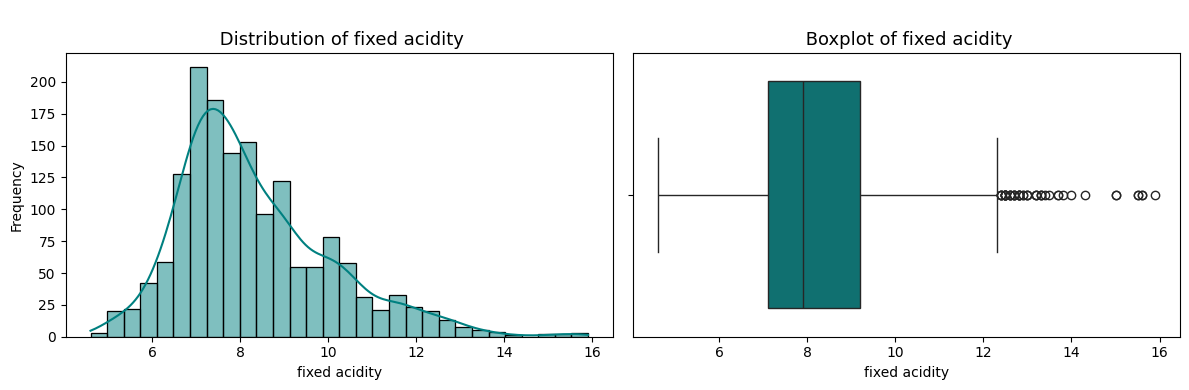

fixed acidity is moderately skewed.


In [60]:
# 1. Fixed Acidity
univariate_numerical_eda(df, 'fixed acidity')


 Feature: fixed acidity
       fixed acidity
count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000

Skewness: 0.983
Kurtosis: 1.132


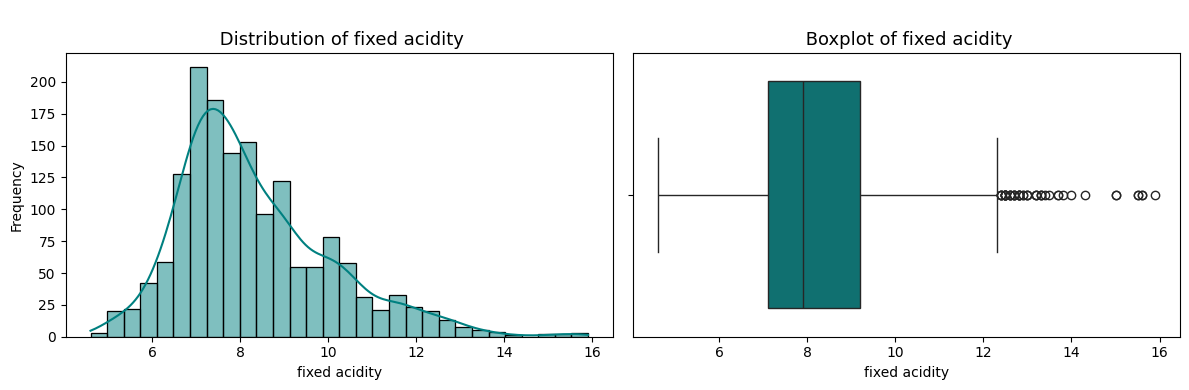

fixed acidity is moderately skewed.
 Feature: volatile acidity
       volatile acidity
count       1599.000000
mean           0.527821
std            0.179060
min            0.120000
25%            0.390000
50%            0.520000
75%            0.640000
max            1.580000

Skewness: 0.672
Kurtosis: 1.226


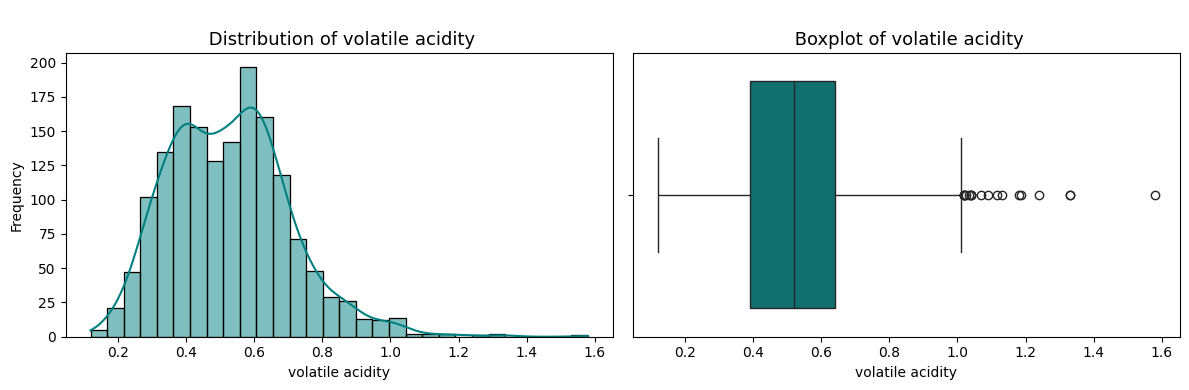

volatile acidity is moderately skewed.
 Feature: citric acid
       citric acid
count  1599.000000
mean      0.270976
std       0.194801
min       0.000000
25%       0.090000
50%       0.260000
75%       0.420000
max       1.000000

Skewness: 0.318
Kurtosis: -0.789


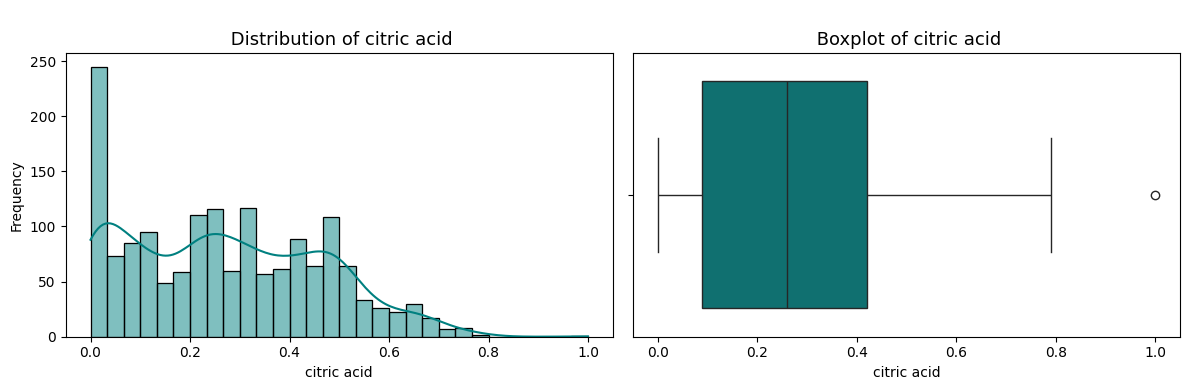

citric acid is fairly symmetric.
 Feature: residual sugar
       residual sugar
count     1599.000000
mean         2.538806
std          1.409928
min          0.900000
25%          1.900000
50%          2.200000
75%          2.600000
max         15.500000

Skewness: 4.541
Kurtosis: 28.618


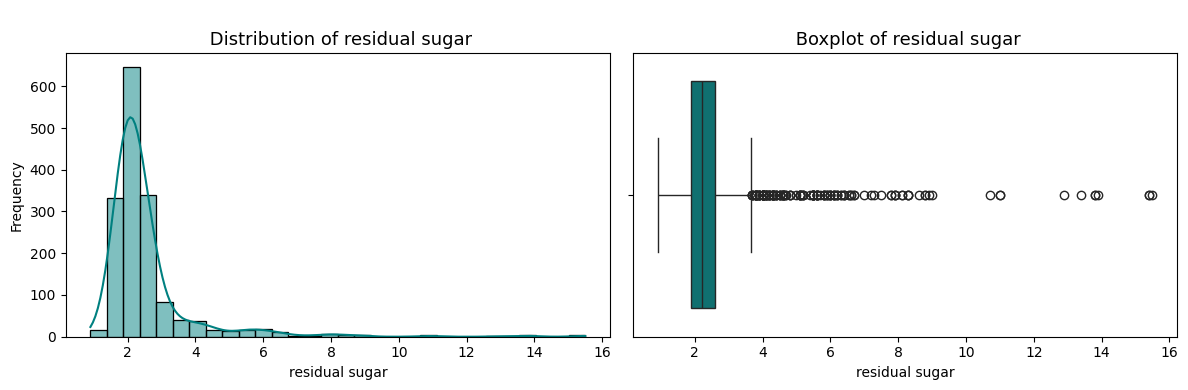


 residual sugar is highly skewed. Consider log or Box-Cox transformation.
 Feature: chlorides
         chlorides
count  1599.000000
mean      0.087467
std       0.047065
min       0.012000
25%       0.070000
50%       0.079000
75%       0.090000
max       0.611000

Skewness: 5.680
Kurtosis: 41.716


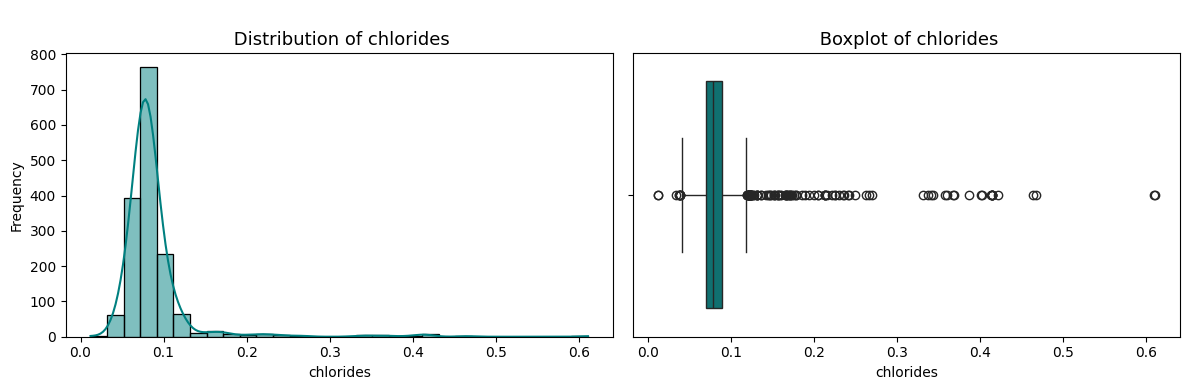


 chlorides is highly skewed. Consider log or Box-Cox transformation.
 Feature: free sulfur dioxide
       free sulfur dioxide
count          1599.000000
mean             15.874922
std              10.460157
min               1.000000
25%               7.000000
50%              14.000000
75%              21.000000
max              72.000000

Skewness: 1.251
Kurtosis: 2.024


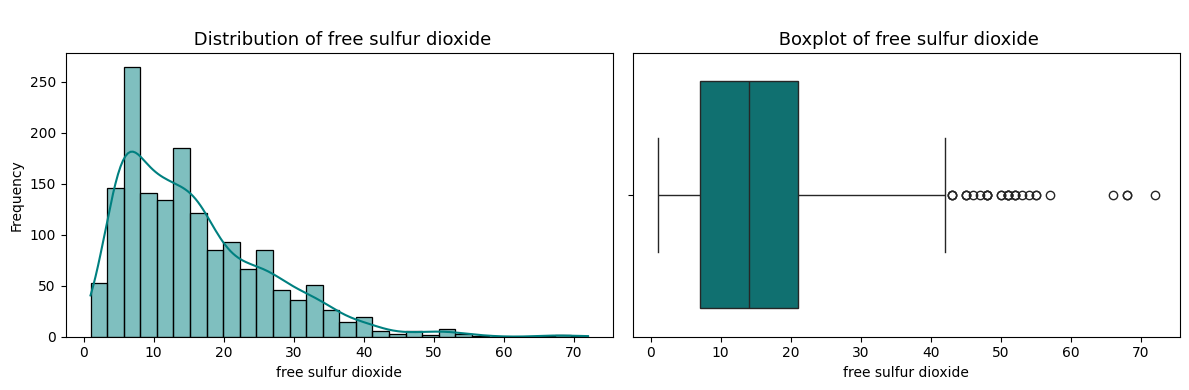


 free sulfur dioxide is highly skewed. Consider log or Box-Cox transformation.
 Feature: total sulfur dioxide
       total sulfur dioxide
count           1599.000000
mean              46.467792
std               32.895324
min                6.000000
25%               22.000000
50%               38.000000
75%               62.000000
max              289.000000

Skewness: 1.516
Kurtosis: 3.810


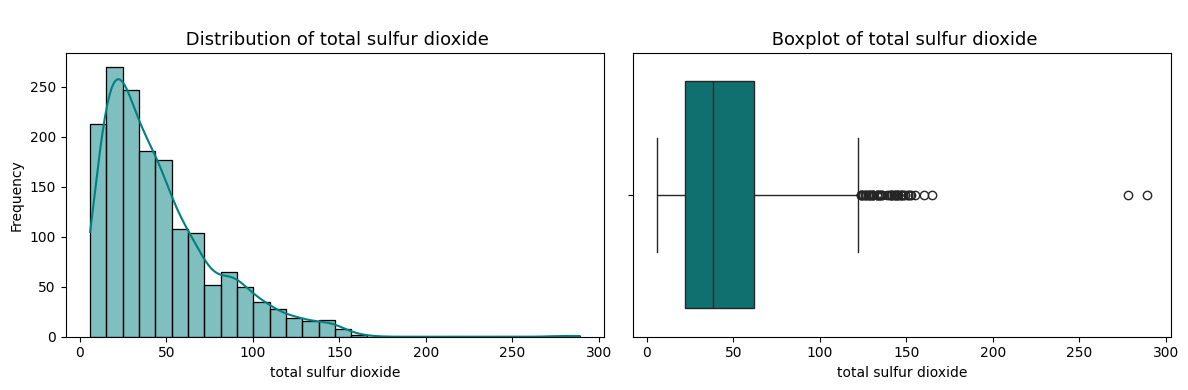


 total sulfur dioxide is highly skewed. Consider log or Box-Cox transformation.
 Feature: density
           density
count  1599.000000
mean      0.996747
std       0.001887
min       0.990070
25%       0.995600
50%       0.996750
75%       0.997835
max       1.003690

Skewness: 0.071
Kurtosis: 0.934


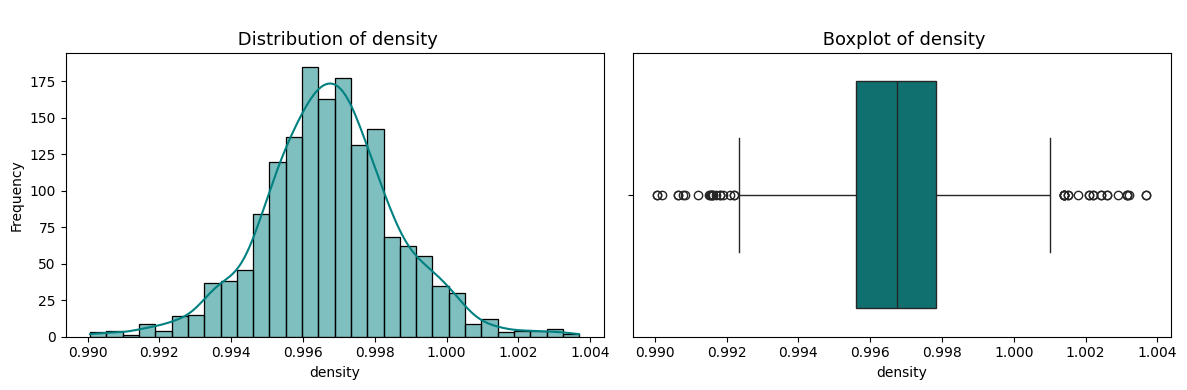

density is fairly symmetric.
 Feature: pH
                pH
count  1599.000000
mean      3.311113
std       0.154386
min       2.740000
25%       3.210000
50%       3.310000
75%       3.400000
max       4.010000

Skewness: 0.194
Kurtosis: 0.807


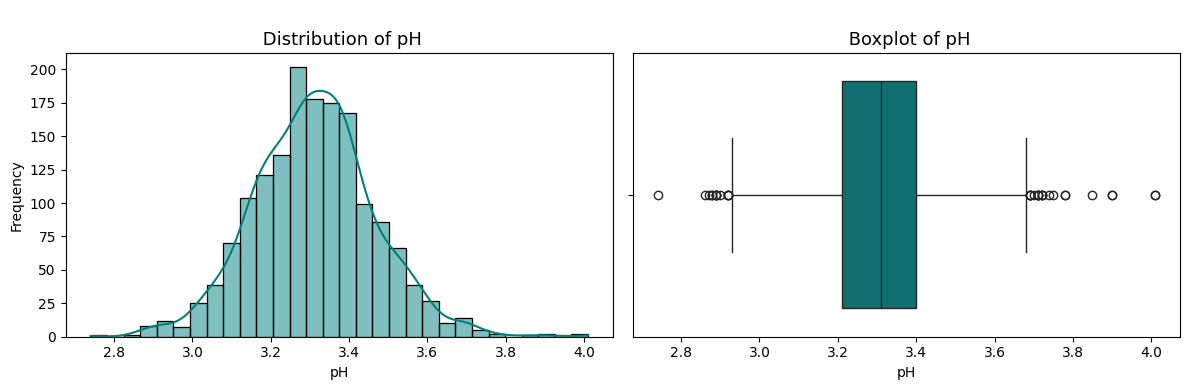

pH is fairly symmetric.
 Feature: sulphates
         sulphates
count  1599.000000
mean      0.658149
std       0.169507
min       0.330000
25%       0.550000
50%       0.620000
75%       0.730000
max       2.000000

Skewness: 2.429
Kurtosis: 11.720


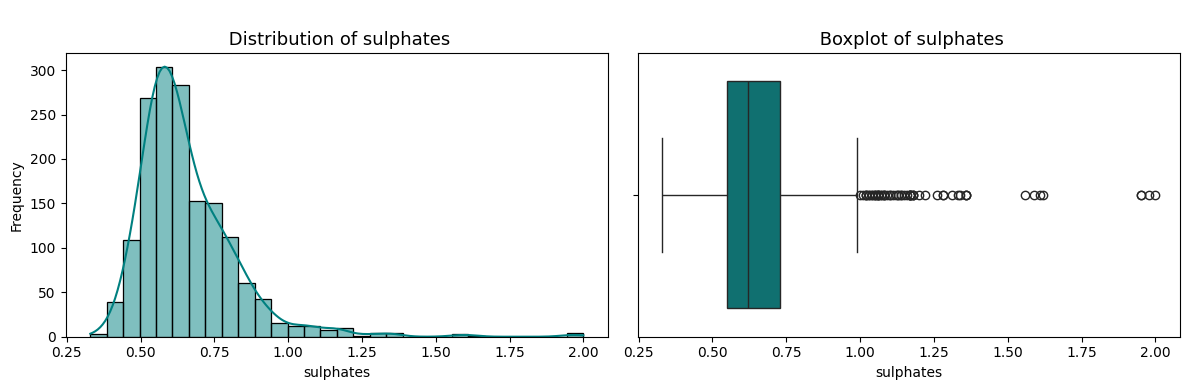


 sulphates is highly skewed. Consider log or Box-Cox transformation.
 Feature: alcohol
           alcohol
count  1599.000000
mean     10.422983
std       1.065668
min       8.400000
25%       9.500000
50%      10.200000
75%      11.100000
max      14.900000

Skewness: 0.861
Kurtosis: 0.200


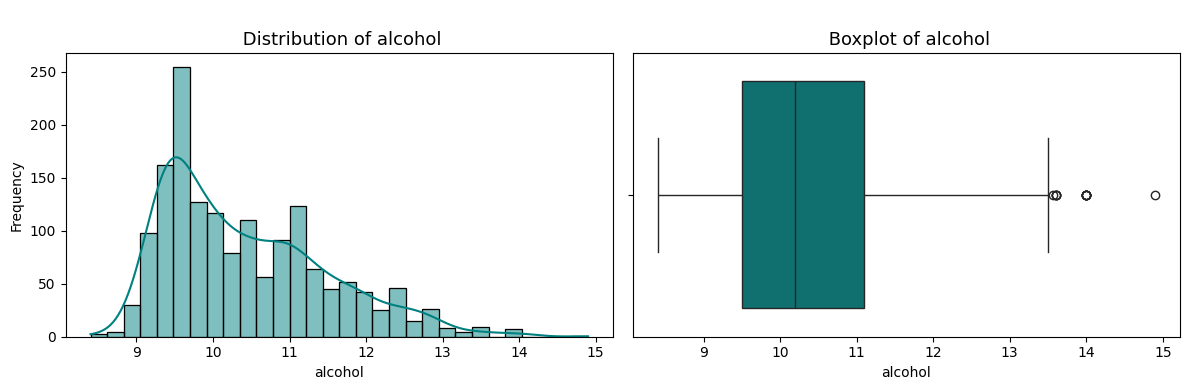

alcohol is moderately skewed.
 Feature: quality
           quality
count  1599.000000
mean      5.636023
std       0.807569
min       3.000000
25%       5.000000
50%       6.000000
75%       6.000000
max       8.000000

Skewness: 0.218
Kurtosis: 0.297


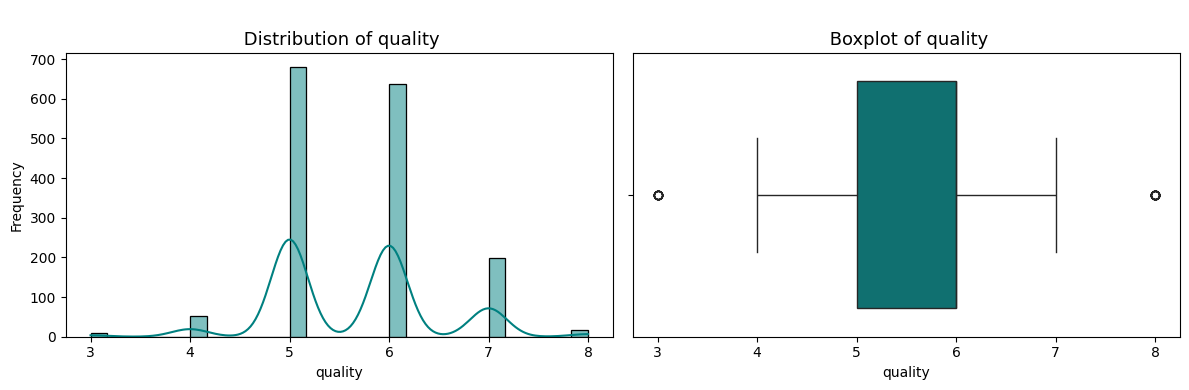

quality is fairly symmetric.


In [61]:
# We can loop to save time
for col in num_features:
    univariate_numerical_eda(df, col)

In [62]:

def univariate_categorical_eda(df, column):
    """
    Performs univariate EDA on a categorical or ordinal column.
    Displays frequency table, proportion, and a countplot.
    """
    print(f"Feature: {column}")
    print("="*40)

    # Frequency + proportion
    freq = df[column].value_counts()
    prop = df[column].value_counts(normalize=True) * 100
    summary = pd.DataFrame({'Count': freq, 'Percentage': prop.round(2)})
    print(summary)
    print()

    # Visualization
    plt.figure(figsize=(8,5))
    ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')
    plt.title(f'Distribution of {column}', fontsize=13)
    plt.xlabel(column)
    plt.ylabel('Count')

    # Annotate each bar with percentage
    total = len(df[column])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height + 1,
                f'{(height/total)*100:.1f}%', ha='center')

    plt.tight_layout()
    plt.show()


In [63]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_label'],
      dtype='object')

In [64]:

red_wine["quality_label"].unique()

array(['Medium', 'High', 'Low'], dtype=object)

Feature: quality_label
               Count  Percentage
quality_label                   
Medium          1319       82.49
High             217       13.57
Low               63        3.94



C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_23376\2475393008.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')


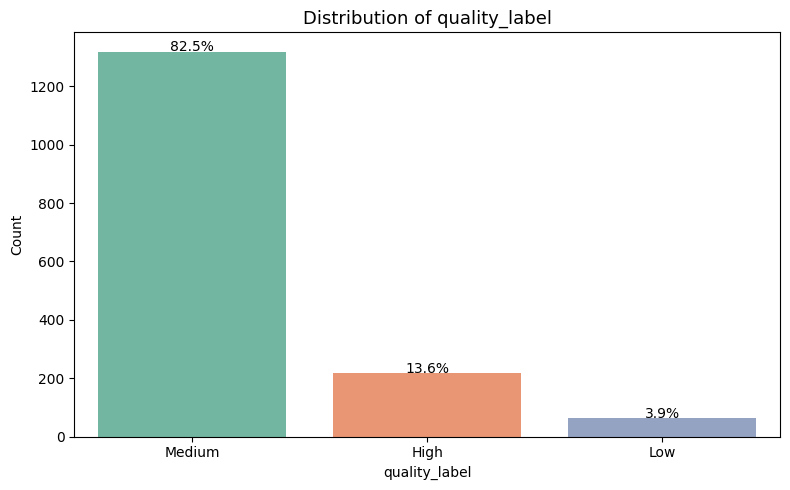

In [65]:
univariate_categorical_eda(red_wine,"quality_label" )

**Key Univariate Findings**

| Feature Type                     | Observation                                                                                                          | What It Means / Implication                                                                                                                             |
| -------------------------------- | -------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Most numeric features**        | Continuous, but several (e.g., `residual sugar`, `total sulfur dioxide`, `free sulfur dioxide`) are **right-skewed** | These long tails can distort algorithms sensitive to scale (e.g., linear regression, KNN ).  We might apply **log or Box-Cox transformation** to normalize. |
| **`alcohol`**                    | Often roughly symmetric but **wide range**                                                                           | Important predictor — normalization or standardization can stabilize learning.                                                                          |
| **`volatile acidity`**           | Often slightly right-skewed                                                                                          | Outliers might indicate poor fermentation  we will check relationships with `quality` later.                                                             |
| **Outliers visible in boxplots** | Especially in sulfur-related variables                                                                               | Before modeling, we must decide: **clip, transform, or leave** (some are natural domain outliers).                                                      |
| **`quality` (numeric)**          | Discrete integers, concentrated in 5–6                                                                               | Dataset is **imbalanced** — middle (Medium quality) dominates.                                                                                          |


**How do sort things out from the insight we have gathered**

| Insight                              | Why It Matters                                                                                                 | Actionable Step                                                                  |
| ------------------------------------ | -------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------- |
| **Skewed variables**                 | Some algorithms (like linear/logistic regression, SVMs, KNNs) assume features are approximately normal.        | Apply transformations (`np.log1p`, `StandardScaler`, etc.) where needed.         |
| **Wide feature ranges**              | Features measured on different scales (e.g., pH ~3–4, sulfur dioxide ~0–300) can cause biased weight learning. | Use **scaling** (e.g., StandardScaler or MinMaxScaler).                          |
| **Outliers**                         | May heavily influence mean-based models.                                                                       | Investigate domain causes - use **IQR-based clipping or robust scaling**.        |
| **Imbalanced target**                | ML models may favor the majority class (“Medium”).                                                             | Use **resampling** (SMOTE, stratified split) or **class weights** later.         |
| **Ordinal target (`quality_label`)** | Although `quality` is numeric, its meaning is ordinal.                                                         | Consider both: regression (numeric quality) or classification (Low/Medium/High). |


In summary, 
So, at this stage:

- We understand our variables individually

- We know where to clean, transform, or normalize
- We have seen what our class is like(wine quality) in terms of balance

We can now move into Bivariate EDA, to see how these variables relate to each other and to quality

----------------------------------------------------------------
 ### **2. Bivariate analysis**
 ---------------------------------------------------------------

This explore **relationships** between **two variables** using **scatter plots**,**boxplots**, and **bar plots**. This helps reveal trends, patterns, and possible associations.

- Our goals is to understand how two variables relate, especially how input **features** relate to the **target**.
This helps us:

- To identify predictive features

- To detect linear/nonlinear trends

- To spot interactions

- To see where transformation or encoding may help later

**How to read a boxplot**
| What you see       | What it means                                                             |
| ------------------ | ------------------------------------------------------------------------- |
| **Wide box**       | High variability - the feature values differ a lot among samples.         |
| **Narrow box**     | Low variability - values are similar across samples.                      |
| **Long whiskers**  | Some extreme but valid values (large spread overall).                     |
| **Short whiskers** | Most data clustered tightly.                                              |
| **Many outliers**  | Some points lie far from the bulk of data - possibly skewed or irregular. |


**How to read a violin plot**

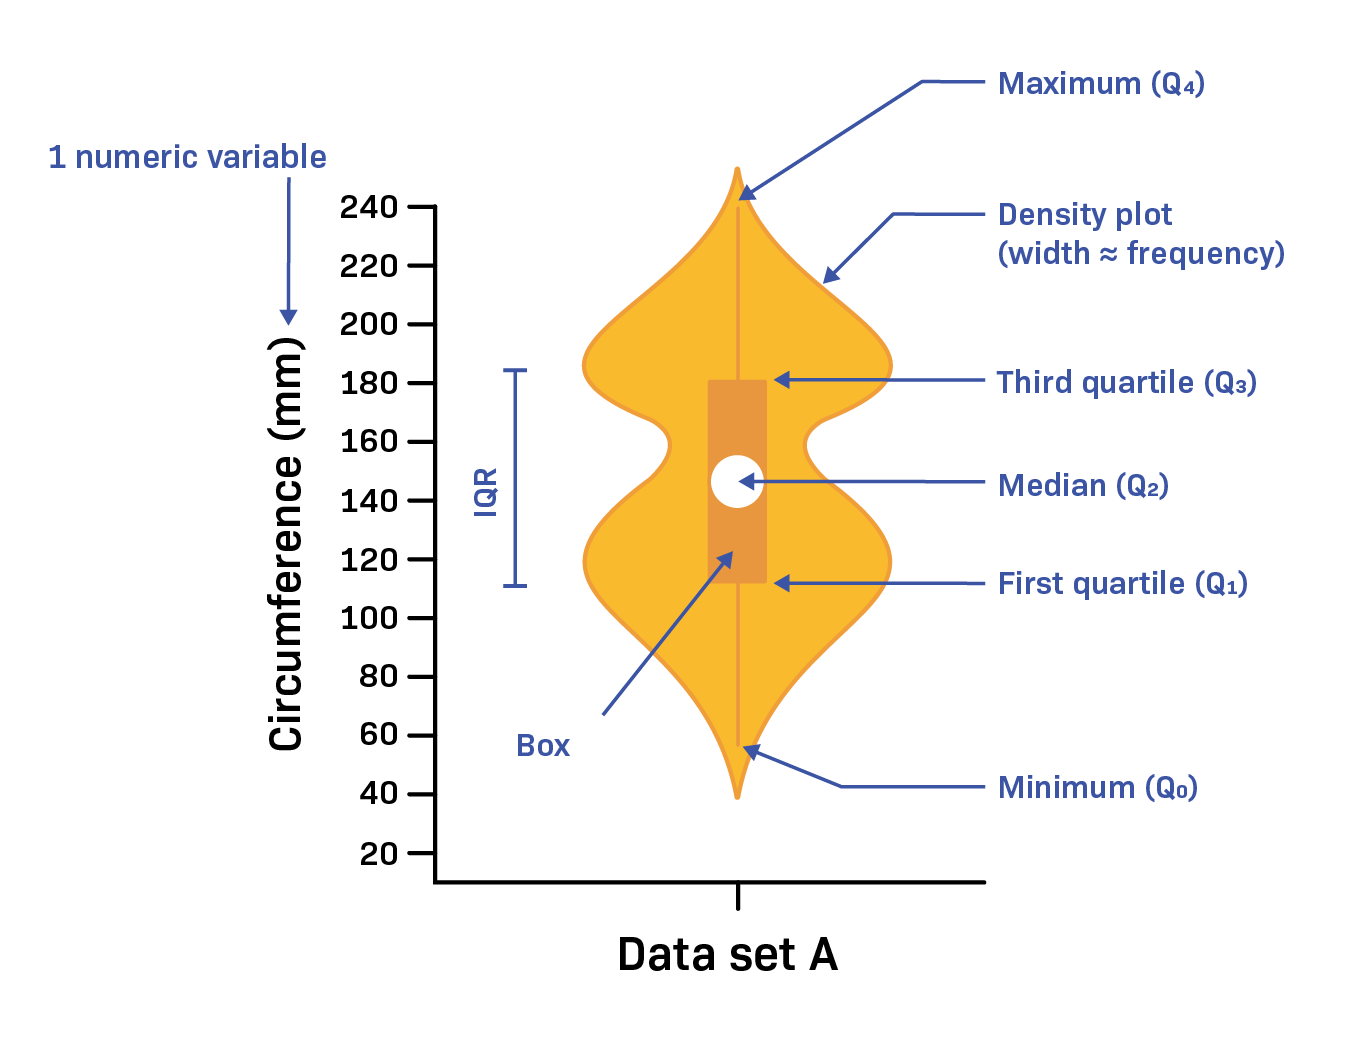

Lets compare

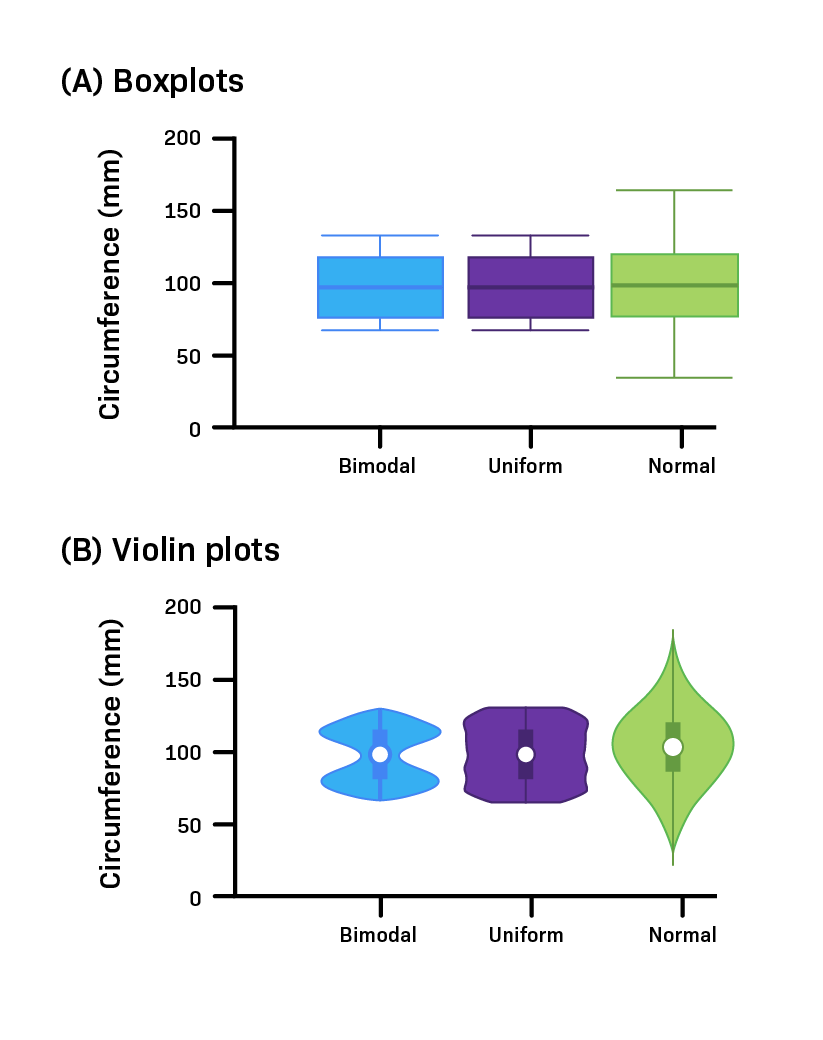


1. A violin plot helps you see **where most of your data values fall** and **how spread out they are** all in one chart.

2. **How it works**

   * It combines a **boxplot** (which shows median and spread)
     with a **density curve** (which shows the shape of the distribution).
   * The **white dot** in the center = the **median** (middle value).
   * The **box** shows the **middle 50%** of the data (called the IQR).
   * The **line** extending from the box shows the **range** (how far values go).
   * The **width** of the “violin” at any point shows how many data points fall there  wider parts mean **more data**, thinner parts mean **less data**.

3. **Why it’s useful:**

   * It shows **how the data is shaped** whether it’s balanced (normal), one-sided (skewed), or even has **two peaks** (bimodal).
   * This is something a normal boxplot can hide.

    * A **bimodal** dataset (two peaks) and a **flat** dataset (uniform) can look almost the same in a boxplot but a violin plot makes the difference obvious.


| **Violin Plot Element**           | **What It Represents**                           | **How to Interpret It**                                                     | **What It Means for Analysis**                                       |
| --------------------------------- | ------------------------------------------------ | --------------------------------------------------------------------------- | -------------------------------------------------------------------- |
| **Width (Thickness)**             | Data density at a given value                    | The thicker (wider) the section, the more data points there are there       | Shows where most observations cluster (the “mode” area)              |
| **Center Line / White Dot**       | Median value                                     | Middle value of the data                                                    | Compare medians across groups to see shifts in central tendency      |
| **Black Bar (Box)**               | Interquartile range (IQR = 25th–75th percentile) | Where the middle 50% of the data lies                                       | Compact IQR - consistent values; wide IQR - variable data            |
| **Overall Height**                | Range of data values                             | Vertical span from minimum to maximum                                       | Larger height - more variation; smaller height - more uniform        |
| **Shape (Symmetry)**              | Distribution shape (normal, skewed, bimodal)     | Left tail longer - negatively skewed; right tail longer - positively skewed | Reveals skewness and potential outliers                              |
| **Multiple Violins Side-by-Side** | Different categories                             | Compare distributions directly across groups                                | Great for spotting which category has higher medians or wider spread |



**Lets start our bivariate analysis**

We can go about it this way, for the sake of simplicity

| Level                      | Focus                        | Techniques / Tools                                   |
| -------------------------- | ---------------------------- | ---------------------------------------------------- |
| **1. Numeric–Numeric**     | Correlation and scatterplots | `.corr()`, `sns.heatmap()`, `sns.scatterplot()`      |
| **2. Numeric–Categorical** | Feature vs `quality_label`   | `sns.boxplot()`, `sns.violinplot()`, group summaries |



In [66]:
# Lets find the numerical features
num_features = red_wine.select_dtypes(include=['int64', 'float64']).columns

# convert to dataframe

num_features = pd.DataFrame(red_wine[num_features])
num_features.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


1. Numeric to Numeric

Correlation with target

In [ ]:


def correlation_with_target(df, target_col, figsize=(10,2)):
    """
    Plots a heatmap showing correlation of each numeric feature against target_col.
    Returns a Series of correlations (sorted by absolute magnitude).
    """
    # Keep only numeric columns
    numeric_df = df.select_dtypes(include='number').copy()
    if target_col not in numeric_df.columns:
        raise ValueError(f"Target column '{target_col}' must be numeric and present in the dataframe.")

    # compute correlations of every numeric column with the target
    corrs = numeric_df.corrwith(numeric_df[target_col]).drop(target_col)

    corrs_df = corrs.to_frame(name='corr').T  # shape (1, n)

    plt.figure(figsize=figsize)
    sns.heatmap(
        corrs_df,
        annot=True,
        fmt=".3f",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'orientation': 'vertical', 'shrink':0.7}
    )
    plt.xticks(rotation=45, ha='right')
    plt.yticks([0], [target_col], rotation=0)
    plt.title(f'Correlation of numeric features with {target_col}', fontsize=12)
    plt.tight_layout()
    plt.show()

    # return sorted correlations for downstream use
    return corrs.reindex(corrs.abs().sort_values(ascending=False).index)


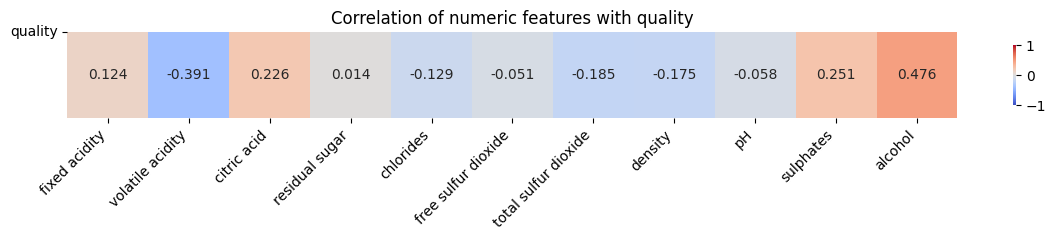

alcohol                 0.476166
volatile acidity       -0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
fixed acidity           0.124052
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
dtype: float64


In [ ]:
corr_series = annotated_target_heatmap(df, 'quality', figsize=(12,2.5))
print(corr_series) 


| Feature                  | Correlation | Interpretation                                                                                      |
| ------------------------ | ----------- | --------------------------------------------------------------------------------------------------- |
| **alcohol**              | +0.48       | Strongest positive — higher alcohol → higher quality. Likely a key predictive feature.              |
| **volatile acidity**     | −0.39       | Strong negative — too much volatility (vinegar-like taste) reduces quality. Very important feature. |
| **sulphates**            | +0.25       | Moderate positive — contributes to stability and aroma. Helpful but secondary predictor.            |
| **citric acid**          | +0.23       | Slightly positive — adds freshness; balanced wines score higher.                                    |
| **total sulfur dioxide** | −0.19       | Too much preservation reduces quality.                                                              |
| **density**              | −0.17       | Lower density wines (lighter, less sugar) tend to score higher.                                     |
| **chlorides**            | −0.13       | Saltier taste lowers quality.                                                                       |
| **fixed acidity**        | +0.12       | Minor positive — balanced acidity helps.                                                            |
| **pH**                   | −0.06       | Weak negative; higher pH (less acidic) slightly lowers quality.                                     |
| **free sulfur dioxide**  | −0.05       | Minimal linear relationship.                                                                        |
| **residual sugar**       | +0.01       | Negligible — sweetness isn’t driving quality here.                                                  |


**How does this help our model**

| Action                                                     | Explanation                                                                                              |
| ---------------------------------------------------------- | -------------------------------------------------------------------------------------------------------- |
| **Keep alcohol, volatile acidity, sulphates, citric acid** | Strong predictors. You’ll definitely include them.                                                       |
| **Be cautious with total sulfur dioxide & density**        | Moderate effect; consider non-linear relationships or transformations.                                   |
| **Residual sugar, free SO₂**                               | Probably drop unless domain reasoning suggests otherwise.                                                |
| **Interactions to test:**                                  | `alcohol * acidity`, `citric acid * sulphates`, or `density * pH` — may capture subtle combined effects. |


In [68]:
from scipy.stats import pearsonr

def numeric_bivariate_plot(df, x_col, y_col):
    """
    Plots the relationship between two numeric variables with a regression line
    and displays the correlation coefficient.

    Parameters:
    -----------
    df : pandas.DataFrame
        Dataset containing the numeric columns
    x_col : str
        Name of the first numeric variable (x-axis)
    y_col : str
        Name of the second numeric variable (y-axis)
    """

    # Calculate correlation coefficient
    corr, p_value = pearsonr(df[x_col], df[y_col])

    # Create plot
    plt.figure(figsize=(8, 5))
    sns.regplot(data=df, x=x_col, y=y_col, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    
    # Title and labels
    plt.title(f"{y_col} vs {x_col}\nCorrelation: {corr:.3f} (p={p_value:.3f})", fontsize=13)
    plt.xlabel(x_col, fontsize=11)
    plt.ylabel(y_col, fontsize=11)
    plt.grid(alpha=0.3)
    plt.show()


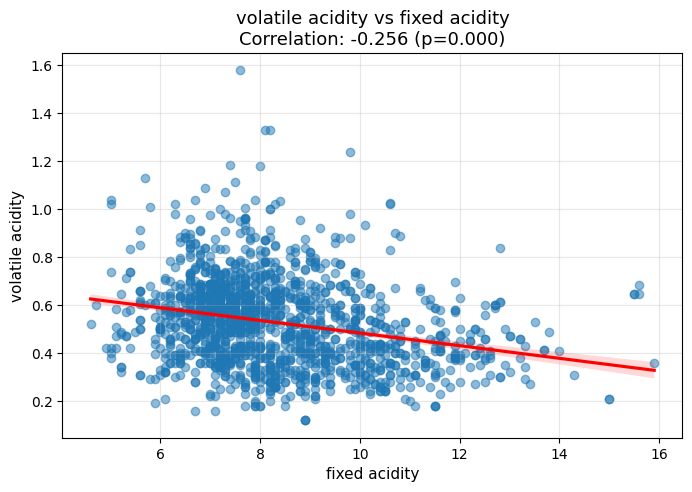

In [69]:
numeric_bivariate_plot(df, 'fixed acidity', 'volatile acidity')


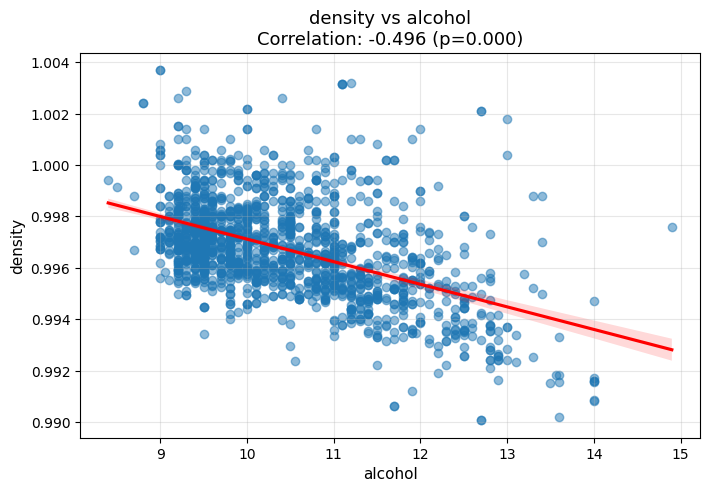

In [70]:
numeric_bivariate_plot(df, 'alcohol', 'density')

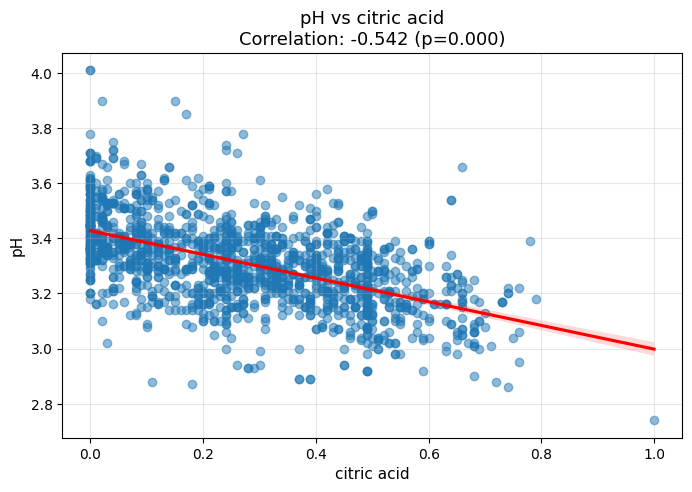

In [71]:
numeric_bivariate_plot(df, 'citric acid', 'pH')

**Task**
Answer the following questions
1. Run for the rest of the features

2. After each plot, ask

- Does the red regression line slope upward or downward?

- Are points tightly packed around the line or scattered widely?

- Are there outliers pulling the line?


**Numeric–Categorical (Feature vs Target)**

In [72]:
def bivariate_num_cat(df, feature, target='quality_label'):
    """
    Plots and summarizes relationship between a numerical feature and a categorical target.
    """
    print(f" Feature: {feature} vs {target}")
    print("="*50)

    # Group summary
    summary = df.groupby(target)[feature].describe()[['mean','std','min','max']]
    print(summary)
    print()

    plt.figure(figsize=(10,5))

    # Boxplot + mean line
    sns.boxplot(x=target, y=feature, data=df, palette='Set2')
    plt.title(f'{feature} across {target} categories', fontsize=13)
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.show()

    # Violin plot for distribution shape
    plt.figure(figsize=(10,5))
    sns.violinplot(x=target, y=feature, data=df, palette='Set3')
    plt.title(f'{feature} distribution by {target}', fontsize=13)
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.show()


In [73]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_label'],
      dtype='object')

In [74]:
# lets apply our function using loops
# for col in num_features:
#     bivariate_num_cat(red_wine, col, target='quality_label')

 Feature: fixed acidity vs quality_label
                   mean       std  min   max
quality_label                               
High           8.847005  1.999977  4.9  15.6
Low            7.871429  1.649284  4.6  12.5
Medium         8.254284  1.682935  4.7  15.9



C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_23376\2920058453.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


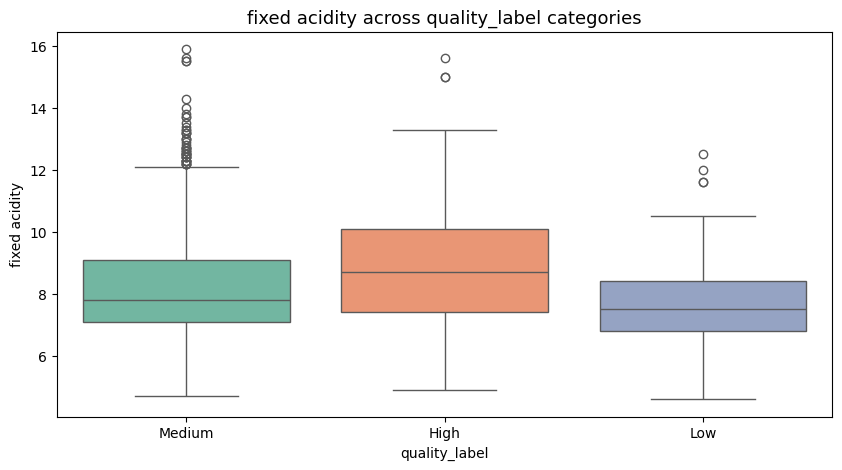

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_23376\2920058453.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=df, palette='Set3')


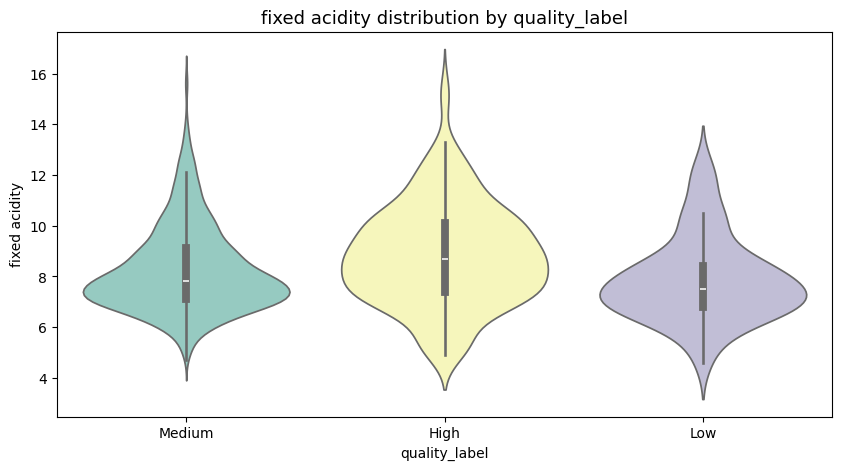

In [75]:
bivariate_num_cat(red_wine, "fixed acidity", target='quality_label')

**Median trend in the boxplot**

The median fixed acidity increases slightly from Low to Medium to High quality wines. This suggests that wines with higher fixed acidity tend to have better quality (up to a point).

**Distribution trend in the violin plot**

The violin plot shows how fixed acidity is distributed across Low, Medium, and High quality wines.

- The High-quality wines have a wider and slightly higher concentration of fixed acidity values around 8–10, suggesting that better wines often contain moderately higher acidity levels.

- The Medium-quality wines show a tight, dense cluster around 7–8, meaning most wines in this group share similar acidity levels.

- The Low-quality wines also cluster near 7, but their distribution is narrower, showing less variation in acidity.

In summary, the shape of the violins shows that while acidity tends to increase with wine quality, there is considerable overlap between categories — indicating that acidity alone may not be enough to distinguish wine quality perfectly.

**Task**
- Run and interpret for the remaining features

----------------------------------------------------------------
 ### **3. Trivariate analysis**
 ---------------------------------------------------------------

Here, we will introduce a hue (color) or size dimension.

This will let us answer questions like,

“Does the relationship between alcohol and density look different for high-, medium-, and low-quality wines?”
“Do high-quality wines cluster differently when acidity and alcohol interact?”

| **Plot Type**                            | **Example Use**                                          | **Insight**                              |
| ---------------------------------------- | -------------------------------------------------------- | ---------------------------------------- |
| `sns.scatterplot(x, y, hue=categorical)` | `alcohol` vs `density` colored by `quality_cat`          | See how categories differ visually       |
| `sns.pairplot(hue=categorical)`          | View several numeric–numeric combos, colored by category | Good for overall pattern exploration     |
| `sns.lmplot(x, y, hue=categorical)`      | Adds regression line per category                        | Compare trends per group                 |
| `sns.kdeplot(x, y, hue=categorical)`     | Density-based relationship                               | See overlapping regions among categories |


In [76]:
def trivariate_plot(df, x_col, y_col, hue_col):
    """
    Visualizes the relationship between two numeric variables
    with a third categorical variable shown by color (hue).
    
    Parameters
    ----------
    df : pandas.DataFrame
        The dataset.
    x_col : str
        The first numeric feature (x-axis).
    y_col : str
        The second numeric feature (y-axis).
    hue_col : str
        The categorical feature (color grouping).
    """

    plt.figure(figsize=(8, 6))
    sns.lmplot(
        data=df, 
        x=x_col, 
        y=y_col, 
        hue=hue_col, 
        height=6, 
        aspect=1.2, 
        scatter_kws={'alpha':0.6}, 
        line_kws={'linewidth':2}
    )
    plt.title(f"{y_col} vs {x_col} by {hue_col}", fontsize=13)
    plt.xlabel(x_col, fontsize=11)
    plt.ylabel(y_col, fontsize=11)
    plt.grid(alpha=0.3)
    plt.show()


<Figure size 800x600 with 0 Axes>

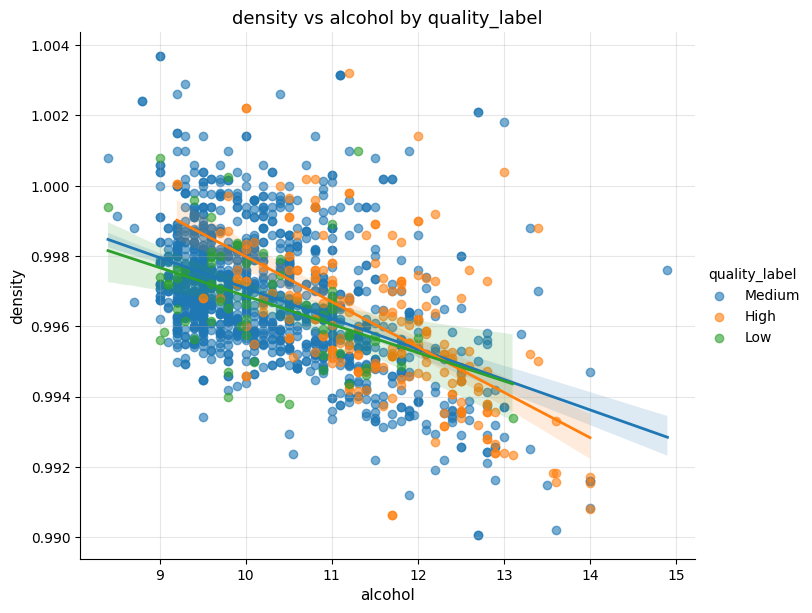

In [77]:
# Example: explore alcohol vs density by wine quality category
trivariate_plot(df, 'alcohol', 'density', 'quality_label')

**Axes**

**X-axis (alcohol)**: Represents the percentage of alcohol in the wine.

**Y-axis (density)**: Represents the wine’s density (how heavy it is for its volume).

**Trend**

The downward slope of the regression lines for all quality categories (Low, Medium, High) shows a negative correlation between alcohol and density.

This means that as alcohol content increases, the wine’s density tends to decrease.

**Quality differences**

Although all three quality groups (Low = green, Medium = blue, High = orange) follow a similar negative trend, there are subtle distinctions:

- **High-quality wines (orange)** appear to cluster more at higher alcohol levels and lower densities, suggesting that higher alcohol content is often associated with better quality.

- **Low-quality wines (green)** are concentrated around lower alcohol levels and higher densities.

- **Medium-quality wines (blue)** dominate the middle range but also show overlap with both low and high groups.

**Task**

Run the code for the rest of the features and interpret their plots.

 ##### **3. Multivariate analysis**

This examine how **several variables** interact together through **correlation matrices**, **pairplots**, **regression plots**, and **FacetGrids**. This provides insight into the overall data structure and interactions between multiple features.

But since we are familiar with most of the charts and plots, lets try yo see how multiple variables behave together across wine quality groups.

In [79]:
def grouped_summary(df):
    """
    Computes summary statistics grouped by wine quality.
    """
    summary = df.groupby('quality').mean(numeric_only=True).round(2)
    return summary


In [80]:
grouped_summary(num_features)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.36,0.88,0.17,2.64,0.12,11.00,24.90,1.0,3.40,0.57,9.96
4,7.78,0.69,0.17,2.69,0.09,12.26,36.25,1.0,3.38,0.60,10.27
5,8.17,0.58,0.24,2.53,0.09,16.98,56.51,1.0,3.30,0.62,9.90
6,8.35,0.50,0.27,2.48,0.08,15.71,40.87,1.0,3.32,0.68,10.63
7,8.87,0.40,0.38,2.72,0.08,14.05,35.02,1.0,3.29,0.74,11.47
8,8.57,0.42,0.39,2.58,0.07,13.28,33.44,1.0,3.27,0.77,12.09


As wine quality increases

- Unpleasant factors (volatile acidity, chlorides, SO₂) decrease.

- Desirable features (citric acid, sulphates, alcohol) increase.

- Acidity and pH shift slightly to a balanced, fresher zone.

So, higher-quality wines in this dataset tend to be cleaner, slightly more acidic, more alcoholic, and less chemically harsh.

look at the table for how the conclusion was arrived at

| Variable                 | Trend      | Simple Interpretation                                                                                        |
| ------------------------ | ---------- | ------------------------------------------------------------------------------------------------------------ |
| **Fixed acidity**        | Slight ↑   | Higher-quality wines tend to have a bit more acidity — likely giving freshness and structure.                |
| **Volatile acidity**     | ↓          | Lower volatile acidity means less “vinegary” or sharp smell — a key indicator of better quality.             |
| **Citric acid**          | ↑          | More citric acid gives a fresher, fruitier taste, often associated with better wines.                        |
| **Residual sugar**       | ↔ (steady) | No major change — sweetness isn’t the main factor here.                                                      |
| **Chlorides (salt)**     | ↓          | Lower salt content relates to purer, cleaner-tasting wines — better quality.                                 |
| **Free sulfur dioxide**  | ↓ slightly | Slight decrease, meaning better-balanced preservation without harshness.                                     |
| **Total sulfur dioxide** | ↓ strongly | Too much SO₂ can affect aroma; lower values usually mean higher-quality wines.                               |
| **Density**              | ↔ (steady) | Not much change — wine density depends on alcohol and sugar, which balance out.                              |
| **pH**                   | ↓ slightly | Slightly lower pH = more acidity = fresher taste — a good sign.                                              |
| **Sulphates**            | ↑          | Sulphates help with preservation and flavor complexity — a moderate rise supports quality.                   |
| **Alcohol**              | ↑          | Strongest positive trend — higher alcohol content typically contributes to richer flavor and better balance. |


What This Means for Modeling

Feature relevance:

Both fixed acidity, volatile acidity, and pH appear predictive of quality.

We’ll likely want to keep them as model inputs (no dropping or merging yet).

Scaling importance:

Since these acidity measures are on similar but not identical scales, standardization or normalization will help during model training.

Interaction insight:

A model might benefit from interaction terms like

acidity ratio = fixed acidity/ volatile acidity




since balance, not absolute value, is what matters most to wine quality.

[NOTE ON EDA](https://www.geeksforgeeks.org/what-is-exploratory-data-analysis/)


# Comprehensive EDA Report

*(All recommendations are justified by the EDA results above.)*

---

## 0. Executive summary 

The red-wine quality dataset shows that class of quality is imbalanced, **quality is driven by higher alcohol and balanced acidity** (low volatile acidity + moderate fixed/citric acid), with supporting contributions from sulphates and density. Use **classification** models (multiclass), engineer **acidity-ratio** and **interaction** features, scale/transform skewed variables, treat outliers, and prefer tree-based classifiers for production-ready performance — all decisions below are tied to the EDA evidence.

---

## 1. Univariate findings

### Finding (evidence)

* Several variables are **right-skewed** (you observed residual sugar, total SO₂, chlorides skewed in histograms & boxplots).
* Outliers present for sulfur-related and acidity measures in boxplots.

### Recommendations & rationale

1. **Log-transform skewed variables** (e.g., `residual sugar`, `total sulfur dioxide`, `chlorides`).

   * *Rationale:* Skewness → asymmetric influence on distance/linear models and unstable variance. Your EDA showed these variables are right-skewed; log(1+x) reduces influence of extremes and makes distributions more Gaussian-like.
   * *Action:* `df['residual sugar_log'] = np.log1p(df['residual sugar'])` etc.

2. **Outlier handling (Winsorize or IQR-capping) for extreme acidity/sulphates**.

   * *Rationale:* Violin/boxplots show extreme tails. Outliers can distort many algorithms (especially KNN, SVM, linear models).
   * *Action:* Cap values at `Q1 - 1.5*IQR` and `Q3 + 1.5*IQR`, or Winsorize the top/bottom 1–2%.

3. **Scaling**

   * *Rationale:* Features have different ranges (alcohol ~10–12, pH ~3.x, SO₂ up to dozens). For distance-based or regularized models, scale features.
   * *Action:* Use `StandardScaler` for models like Logistic/SVM; `RobustScaler` if outliers remain; tree models do not require scaling but scaled engineered features help interpretability.

4. **Target handling: classification labels**

   * *Rationale:* `quality` is discrete (3–8). It has already been mapped to categories (Low/Medium/High). Use classification pipeline.
   * *Action:* For multiclass classification, either use the integer labels (3–8) with multiclass classifier or use grouped labels (`Low/Medium/High`)  coarser prediction is prefered.

---

## 2. Bivariate findings

### Key EDA evidence

* **Correlation**: `alcohol +0.48`, `volatile acidity −0.39`, `sulphates +0.25`, `citric acid +0.23`.
* **Visuals**: Box/violin plots showed medians shift with quality (alcohol medians increase; volatile acidity medians decrease).

### Recommendations & rationale

1. **Keep high-signal features**: `alcohol`, `volatile acidity`, `sulphates`, `citric acid`, `density`, `chlorides`.

   * *Rationale:* Ranked by correlation and supported by grouped means and visual separation.

2. **Evaluate and drop/ deprioritize low-signal features**: `residual sugar`, `free sulfur dioxide` (very low correlations ~0.01, −0.05).

   * *Rationale:* Low linear relationship  may add noise or overfit. Keep them only if domain knowledge says otherwise, or if new features involving them show predictive gain.

3. **Check multicollinearity** (VIF) among acidity measures and pH.

   * *Rationale:* `fixed acidity` and `pH` are chemically related; using them raw together can inflate VIF. If VIF > 5–10, consider replacing with ratios (see next section).
   * *Action:* Compute VIF and respond accordingly; if high, replace with engineered acidity ratios.

---

## 3. Trivariate & grouped multivariate findings 

### Core evidence

* **Interaction pattern:** high `alcohol` + low `volatile acidity`  highest quality (grouped means & trivariate visuals).
* **Group means:** `alcohol` increased ~9.96 --> 12.09 from quality 3 --> 8; `volatile acidity` decreased ~0.88 --> 0.42.


### Feature engineering recommendations


1. **Acidity ratio: `fixed_to_volatile = fixed_acidity / volatile_acidity`**

   * *Rationale:* Grouped means and violin plots show that quality improves when stable acids (fixed) dominate over volatile (harsh) acids. The ratio captures that balance better than either feature alone.
   * *Action:* `df['FA_to_VA_ratio'] = df['fixed acidity'] / (df['volatile acidity'] + eps)`

2. **Citric balance: `citric_over_total_acid = citric_acid / (fixed_acidity + volatile_acidity + eps)`**

   * *Rationale:* Citric acid adds freshness — EDA showed citric acid rises with quality. Normalizing by total acid captures relative freshness.
   * *Action:* create ratio; `eps` small constant to avoid divide-by-zero.

3. **Alcohol–Acidity interaction: `alcohol_acid_inter = alcohol * (1/ (volatile_acidity + eps))` or `alcohol / volatile_acidity`**

   * *Rationale:* Trivariate analysis showed high alcohol only signals high quality when volatile acidity is low. This interaction explicitly models that synergetic effect.

4. **Fermentation efficiency: `alcohol_density_ratio = alcohol / density`**

   * *Rationale:* Grouped means showed density decreases while alcohol increases with quality — ratio captures fermentation completeness.

5. **Sulphate–citric interaction: `sulphates * citric_acid` or `citric_acid / sulphates`**

   * *Rationale:* EDA suggested sulphates and citric acid jointly correlate with perceived freshness and preservation. Create both multiplicative and ratio variants and validate.



**Implementation notes**

* When adding ratios, add a tiny `eps` (e.g., 1e-6).
* Scale these engineered features after creation (same scaler as raw numeric features).

---

## 4. Model selection & evaluation

### Evidence behind the recommendation

* Nonlinear interactions discovered in trivariate analysis (alcohol × VA etc.) → simple linear separability is limited.
* Target class imbalance (Medium dominates) --> need balanced metrics/strategies.

### Recommended pipeline 

1. **Prepare dataset**

   * Create engineered features above.
   * Log-transform skewed columns.
   * Handle outliers.
   * Scale numeric features (StandardScaler or RobustScaler).

2. **Train/test split**

   * Use **stratified** split on the classification label (quality or quality_label) to preserve class distribution.

3. **Baseline classifier**

   * **Logistic Regression (multinomial)** or **LinearSVC**, to get interpretable baseline and coefficients for feature effect direction.
   * *Rationale:* fast, interpretable baseline against which to measure non-linear gains.

4. **Primary models**

   * **Random Forest Classifier** — robust, captures interactions, insensitive to scaling and moderate outliers.
   * **XGBoost / LightGBM** — usually gives best structured-data performance and handles non-linearity and feature interactions automatically.
   * *Rationale:* EDA showed interactions and nonlinear relationships; tree ensembles are ideal.

5. **If you want probability calibration** (for business decision thresholds), use **CalibratedClassifierCV** or isotonic regression on tree outputs.

6. **Class imbalance handling**

   * If using grouped three-class (`Low/Medium/High`) and Medium dominates:

     * Use **class_weight='balanced'** for Logistic/Tree, or
     * Use **resampling** (SMOTE for minority oversampling or undersampling majority) only **within CV (cross validation)** to avoid leakage.

7. **Cross-validation & hyperparameter tuning**

   * Use **StratifiedKFold** (k=5 or 10) for reliable multiclass estimates.
   * Use grid/random search with metric = **macro-F1** or **balanced accuracy** to prioritize performance across classes.

8. **Evaluation metrics**

   * **Primary:** macro-F1 (balances class-wise performance) or balanced accuracy.
   * **Secondary:** Confusion matrix to see which quality classes are confused. ROC-AUC per class can be used (one-vs-rest).

9. **Explainability**

   * For final model, run **feature importance** (trees) and **SHAP** values to verify engineered acidity ratios and interactions actually contribute.

---

## 5.  EDA evidence

| Recommendation                                                 | EDA evidence                                                                                       |
| -------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------- |
| Add `fixed_to_volatile` ratio                                  | Grouped means & violin plots: high quality had higher fixed and much lower volatile acidity.            |
| Add `alcohol / density`                                        | Grouped means: alcohol increased ~9.96→12.09 while density decreased with quality.                      |
| Log-transform `residual sugar`, `total SO₂`, `chlorides`       | Univariate histograms: strong right-skew.                                                               |
| Keep `alcohol`, `volatile acidity`, `sulphates`, `citric acid` | High correlation magnitudes: alcohol +0.48, volatile acidity −0.39, sulphates +0.25, citric acid +0.23. |
| Drop/ deprioritize `residual sugar`, `free SO₂`                | Low correlation with quality (~0.01, −0.05) and weak group mean variation.                              |
| Prefer Random Forest / XGBoost                                 | Trivariate visuals show nonlinear interactions (alcohol effectiveness depends on acidity level).        |
| Use stratified CV and macro-F1                                 | Target imbalance (Medium dominates) discovered in categorical univariate analysis.                      |

---

## 6. **Production-oriented suggestions**
 *strictly based on dataset patterns only*

> I am *not* presuming domain expertise beyond the dataset; these are suggestions that follow from what the data shows. For real world production changes please consult an oenologist.

1. **Focus on achieving higher alcohol (within acceptable taste ranges)** — dataset shows mean alcohol is ~9.96 at quality 3 and ~12.09 at quality 8.

   * *Why:* Higher alcohol strongly correlates with higher quality in this dataset (+0.48).
 

2. **Minimize volatile acidity (VA)** — mean VA drops 0.88 → 0.42 as quality rises.

   * *Why:* VA has the second-strongest correlation (−0.39) and EDA visuals show lower VA in high-quality wines.
   * *Actionable:* Monitor fermentation to avoid acetic fermentation; keep VA below identified good-range in data (approx ≤0.4).

3. **Aim for balanced fixed-to-volatile acidity ratio** (engineer and track this ratio).

   * *Why:* EDA showed that balance (not just absolute fixed acid) correlates with higher quality. Ratio is a concise production metric.

4. **Moderate sulphates** — slightly higher sulphates associate with higher quality (but not linearly).

   * *Why:* Sulphates correlate positively (+0.25) and grouped means rise; use moderate, not excessive addition.

5. **Encourage complete fermentation** (reduce density while maintaining alcohol).

   * *Why:* Density decreased while alcohol increased among higher-quality samples. Incomplete fermentation leaves residual sugar (= higher density) and tends to be lower quality.



# **BASELINE MODEL BEFORE PREPROCESSING**

The baseline shows how well the raw data performs “as is.”

- This becomes your reference point — after preprocessing, scaling, and feature engineering, We can measure improvement quantitatively.
- If the model performs poorly or throws errors, it signals missing values, inconsistent types, or extreme skew/outliers.
- The coefficients or feature importances in the baseline model help you see which features already have predictive power. Then we can focus preprocessing on the weaker or noisier variables.

**Building Our Baseline Model**

In [94]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium


In [95]:
df.drop(columns=['quality_label'], inplace=True)

In [96]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [110]:
# split the data

y = df['quality']
X = df.drop(columns=['quality'])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=234)


In [111]:
# lets use logistic regression algorithm to train our base model

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=234, max_iter=10)
model.fit(X_train, y_train)

C:\Users\THINKPAD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\THINKPAD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,234
,solver,'lbfgs'
,max_iter,10
,multi_class,'multinomial'


C:\Users\THINKPAD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\THINKPAD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\THINKPAD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metr

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.70      0.53      0.60       136
           6       0.47      0.79      0.59       128
           7       0.00      0.00      0.00        40
           8       0.00      0.00      0.00         3

    accuracy                           0.54       320
   macro avg       0.19      0.22      0.20       320
weighted avg       0.48      0.54      0.49       320



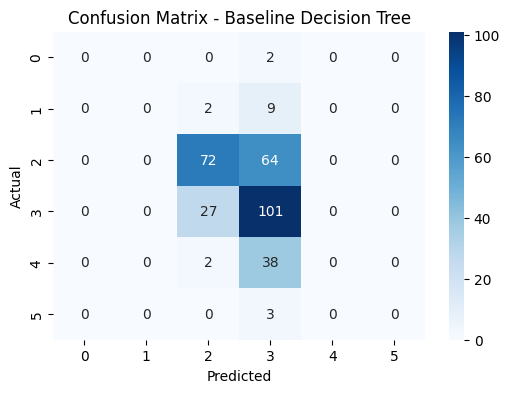

In [112]:


y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion Matrix 
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Baseline Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**A tree based algorithm**

In [113]:
# lets try with a tree base model

from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [114]:
# Evaluate performance 
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.74      0.74      0.74       136
           6       0.67      0.62      0.65       128
           7       0.49      0.62      0.55        40
           8       0.25      0.33      0.29         3

    accuracy                           0.64       320
   macro avg       0.36      0.39      0.37       320
weighted avg       0.64      0.64      0.64       320



Baseline Decision Tree Accuracy: 0.644

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.74      0.74      0.74       136
           6       0.67      0.62      0.65       128
           7       0.49      0.62      0.55        40
           8       0.25      0.33      0.29         3

    accuracy                           0.64       320
   macro avg       0.36      0.39      0.37       320
weighted avg       0.64      0.64      0.64       320



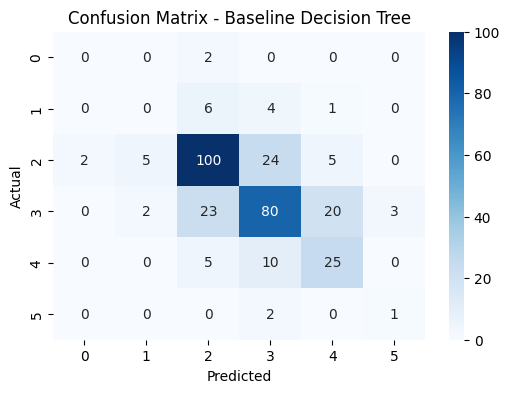

In [115]:
# lets import metrics for classification report

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Decision Tree Accuracy: {accuracy:.3f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix 
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Baseline Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Our Base Model Reports**

| Model                   | Accuracy | Macro F1 | Weighted F1 | Key Strength                                           | Key Weakness                                                                     |
| :---------------------- | :------- | :------- | :---------- | :----------------------------------------------------- | :------------------------------------------------------------------------------- |
| **Logistic Regression** | **0.54** | **0.20** | **0.49**    | Interpretable, fast                                    | Fails on minority classes (3,4,7,8); can’t capture nonlinear relationships       |
| **Decision Tree**       | **0.64** | **0.37** | **0.64**    | Captures nonlinear patterns; robust to feature scaling | Overfits easily; ignores feature correlation and noise; unstable without pruning |


# **EDA INFORMED DATA PREPROCESSING**